#  IMPORTING LIBRARIES & DATASET

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
print(os.listdir("C:/Users/ADITYA AMAN/Desktop/MINI PROJECT"))

['.ipynb_checkpoints', 'Google play store analysis.ipynb', 'googleplaystore.csv', 'googleplaystore_user_reviews.csv', 'Sentiment Analysis of GooglePlayStoreUserReviews.ipynb']


In [2]:
data = pd.read_csv("C:/Users/ADITYA AMAN/Desktop/MINI PROJECT/googleplaystore.csv")

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# DATASET DESCRIPTION & CLEANING

In [4]:
print('Dimentions of google_playstore {}'.format(data.shape))
print('Unique Stores {}'.format(len(data['App'].unique())))

Dimentions of google_playstore (10841, 13)
Unique Stores 9660


In [5]:
print('Missing values in Google_play_store {}'.format(data.isnull().sum()))

Missing values in Google_play_store App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [6]:
# remove duplicates in play store
data= data.drop_duplicates(subset='App')

In [7]:
data.shape

(9660, 13)

In [8]:
print('Missing values in Google_play_store {}'.format(data.isnull().sum()))

Missing values in Google_play_store App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [9]:
data.dropna(inplace=True,subset=['Type','Content Rating','Current Ver','Android Ver'])

In [10]:
data.shape

(9648, 13)

In [11]:
data['Rating'].describe()

count    8190.000000
mean        4.173321
std         0.536691
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [12]:
# filling rating in missing areas by not captured (0)

data.fillna(0,inplace=True)

In [13]:
data[data['Rating'] == 0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,0.0,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,0.0,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,0.0,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,0.0,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,0.0,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up


# Descriptive analysis on play store

            Rating
count  9648.000000
mean      3.542651
std       1.574478
min       0.000000
25%       3.600000
50%       4.200000
75%       4.500000
max       5.000000
After removing the missing values in ratings
            Rating
count  8190.000000
mean      4.173321
std       0.536691
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max       5.000000
excess kurtosis of  distribution : 5.118548660736582
skewness of distribution: -1.7440136482756994


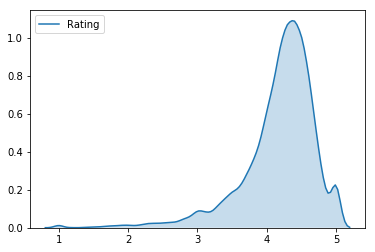

In [17]:
print(data.describe())
# density plot shape
rating = data[data['Rating'] != 0]
print("After removing the missing values in ratings")
print(rating.describe())
sns.kdeplot(shade=True,data=rating['Rating'])

from scipy.stats import kurtosis, skew

x = np.random.normal(0, 2, 10000)
print( 'excess kurtosis of  distribution : {}'.format( kurtosis(rating['Rating']) ))
print( 'skewness of distribution: {}'.format( skew(rating['Rating']) ))


Rating is  Left skewed(Negatively skewed) and median value is around 4.3 from discriptive analysis and density plot.
Kurtosis is around 5.5 that means data is above normal distribution. 
This a actually a good this a rating is above 4 thats a good indication that most of the apps are liked by users.


In [15]:
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [16]:
# visualize the following
# 1. how many apps are free vs paid
# 2. how many genres are there
# 3. represent installs
# 4. represent Content Rating

In [18]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [19]:
list_1 = ['Category', 'Installs', 'Type', 'Content Rating']

In [20]:
def bar_plot(x,y,y_label,x_label,title,color,ax):
    # plt.figure(figsize=(10,5))
    bar = sns.barplot(x = x,y=y,ax=ax,orient='h')
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    for i, v in enumerate(x.values):
        ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    return bar

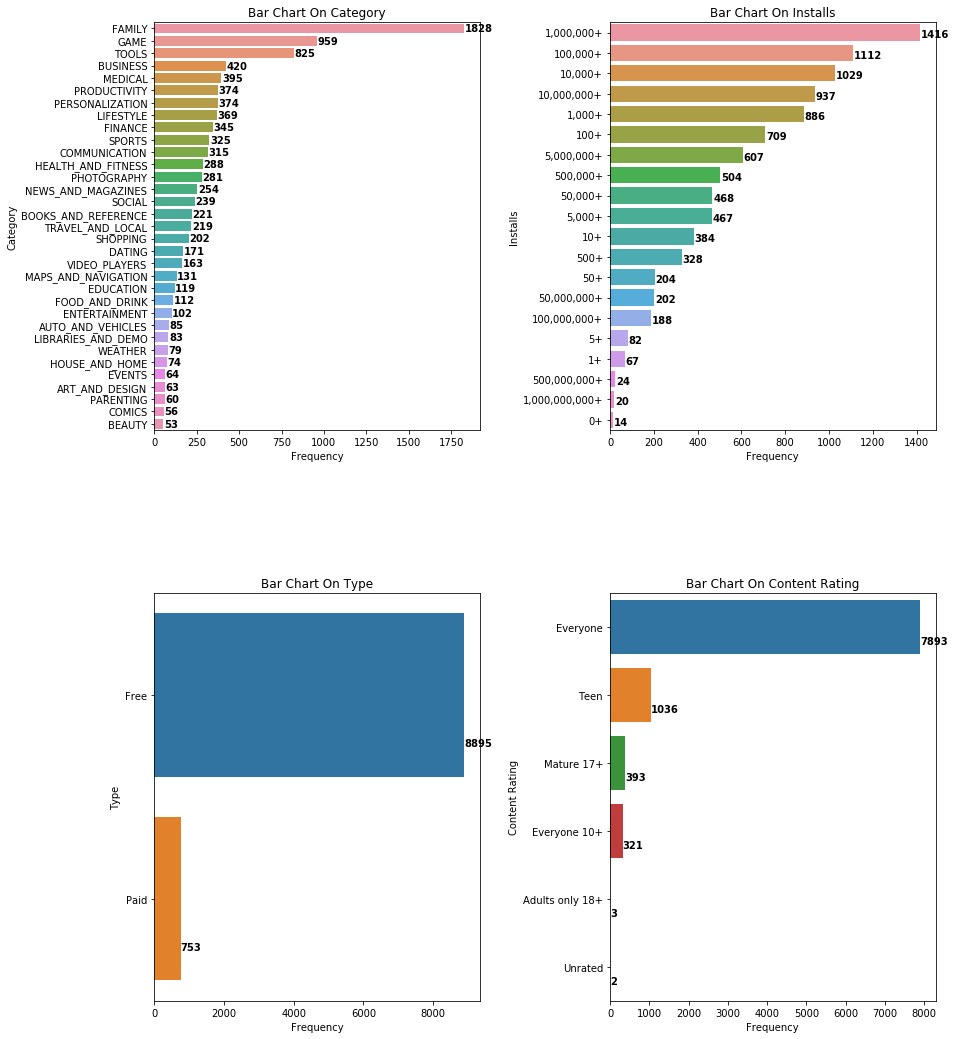

In [21]:
fig = plt.figure(figsize=(14,18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i = 1
for names in list_1:
    ax1 = fig.add_subplot(2, 2, i)
    df2 = data[names].value_counts()
    df2 = df2.reset_index()
    bar_plot(x = df2[names],y = df2['index'],y_label =names,title = 'Bar Chart On {}'.format(names),color='red',ax=ax1,x_label='Frequency')
    i += 1

From the above viz we can see that free apps are more then paid apps in this dataset
From installs we find that there are 20 apps which have like 1 billion downloads
100 Million installs are around for 188 apps and majority of installs are in 1 million and above 10 million installs


In [22]:
list_2 = ['Genres']

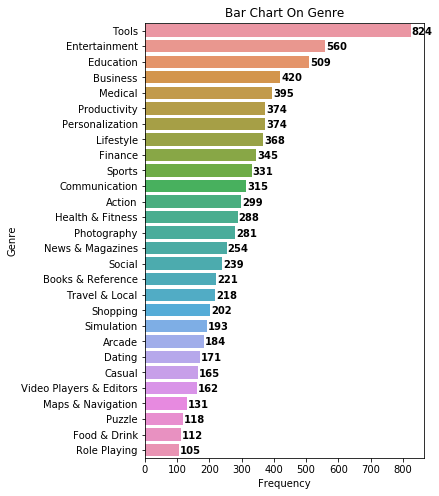

In [23]:
def bar_plot(x,y,y_label,x_label,title,color,ax=None):
    plt.figure(figsize=(5,8))
    bar = sns.barplot(x = x,y=y,orient='h')
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    for i, v in enumerate(x.values):
        bar.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    return bar
df2 = data['Genres'].value_counts()
df2 = df2.reset_index()
df2 = df2[df2['Genres'] > 100]
bar_plot(x = df2['Genres'],y = df2['index'],y_label = 'Genre',title = 'Bar Chart On Genre',color='red',x_label='Frequency')
   

Highest apps are made on tools, entertainment and education

""" Analysis on Apps most popular apps in terms of installs
% of free and paid apps
10 rated apps with installs of 100 million
update year wise
Avg app size by genre"""

In [24]:
# Apps with 1 billion downloads
data[data['Installs'] == '1,000,000,000+']['App']

152                            Google Play Books
335     Messenger – Text and Video Chat for Free
336                           WhatsApp Messenger
338                 Google Chrome: Fast & Secure
340                                        Gmail
341                                     Hangouts
391                Skype - free IM & video calls
865                            Google Play Games
1654                              Subway Surfers
2544                                    Facebook
2545                                   Instagram
2554                                     Google+
2808                               Google Photos
3117                   Maps - Navigate & Explore
3127                          Google Street View
3234                                      Google
3454                                Google Drive
3665                                     YouTube
3687                     Google Play Movies & TV
3736                                 Google News
Name: App, dtype: ob

In [25]:
genres=  list(df2['index'][1:10])

In [26]:
d = pd.DatetimeIndex(data['Last Updated'])
data['year'] = d.year
data['month'] = d.month

In [27]:
for i in genres:
    
    play =data[(data['Installs'] != '1,000,000,000+') & (data['Genres'] == i) & (data['Rating'] >= 4.5) & (data['year'] == 2018)]['App']
    print('')
    print('Printing 10 Apps with 100 million installs and Rating >= 4.5 and Year = 2018 in {}'.format(i))
    print('--------------------------------------------------')
    print(play[0:10])


Printing 10 Apps with 100 million installs and Rating >= 4.5 and Year = 2018 in Entertainment
--------------------------------------------------
876                     ivi - movies and TV shows in HD
882    🔥 Football Wallpapers 4K | Full HD Backgrounds 😍
883            Movies by Flixster, with Rotten Tomatoes
889      Twitch: Livestream Multiplayer Games & Esports
899                   Fandango Movies - Times + Tickets
911                          Investigation Discovery GO
941                                             CW Seed
945                                                 WWE
991                      ColorFul - Adult Coloring Book
994                         Hamilton — The Official App
Name: App, dtype: object

Printing 10 Apps with 100 million installs and Rating >= 4.5 and Year = 2018 in Education
--------------------------------------------------
700                                TED
702                       Khan Academy
703         Learn English with Wlingua
707       

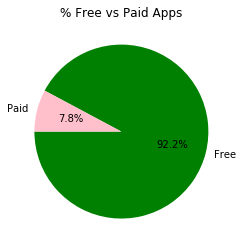

In [28]:

# % free vs paid apps

size=[8895,753]
sentiment = ['Free', 'Paid']
colors = ['g', 'pink']
plt.pie(size, labels=sentiment, colors=colors, startangle=180, autopct='%.1f%%')
plt.title('% Free vs Paid Apps')
plt.show()


In [29]:
# app update

print('Number of apps not been updated since 2016 {}'.format(len(data[data['year'] < 2016])))
print('Number of apps not been updated since 2015 {}'.format(len(data[data['year'] < 2015])))
print('Number of apps not been updated since 2014 {}'.format(len(data[data['year'] < 2014])))                                                       
                                                        

Number of apps not been updated since 2016 801
Number of apps not been updated since 2015 352
Number of apps not been updated since 2014 149


There are around 801 apps that are not been updated since 2 years,these apps might not be in service

In [30]:
# analysis on paided apps

paided = data[data['Type'] == 'Paid']

Text(0.5, 1.0, '% Distribution of Paided Apps Categories')

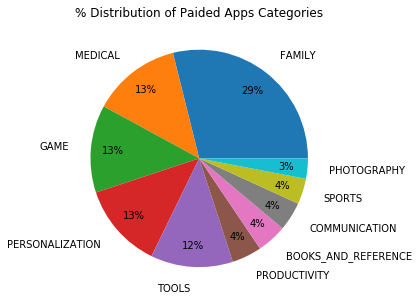

In [31]:
df3 = paided['Category'].value_counts()
df3 = df3.reset_index()
df3 = df3[:10]
plt.figure(figsize=(10,5))
plt.pie(x = list(df3['Category']), labels=list(df3['index']), autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.2)
plt.title('% Distribution of Paided Apps Categories')

Medial apps have  13 % of share, further analysis is required understand medical apps 


In [32]:
# Top rated paid apps with installs 1,000,000+

paided[(paided['Rating'] > 4.7) & (paided['Installs'] == '100,000+') ]['App']



235          Tiny Scanner Pro: PDF Doc Scan
1341         Relax Melodies P: Sleep Sounds
1833                     The Room: Old Sins
3658                       Weather Live Pro
4556                          Day R Premium
6680                            QR Code Pro
8171                  The House of Da Vinci
10531    Kernel Manager for Franco Kernel ✨
Name: App, dtype: object